# EDA Regression

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

Exploratory Data Analysis (EDA) is one of the techniques used for extracting vital features and trends used by machine learning and deep learning models in Data Science. Thus, EDA has become an important milestone for anyone working in data science.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [5]:
df = pd.read_csv('Life Expectancy Data.csv')

This dataset is about life expectancy of every country for every year.

In [6]:
X_cols = ['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 
          'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

y_col = ['Life expectancy ']

### ii. Drop 'y' NaNs

In [7]:
df = df[df[y_col[0]].notna()]

# 2. EDA

### i. Split

**a. Separate all data in train set and test sets**

There can't be intersection of countries. The external countries we are consider are which are from South America.

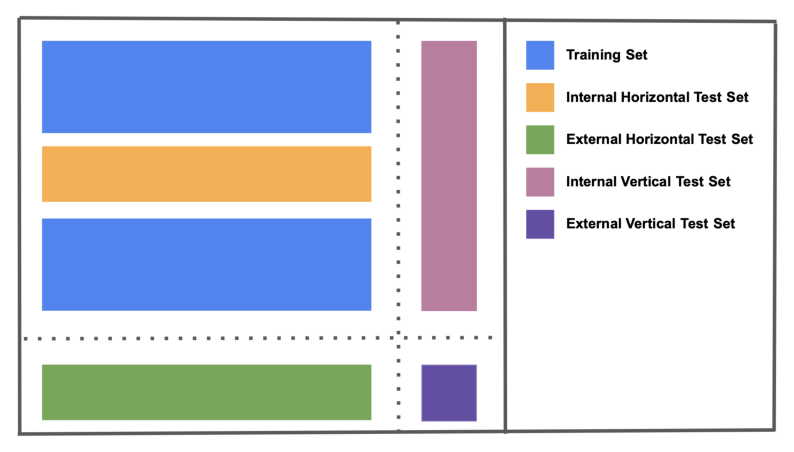

In [8]:
display_img('Separation_1.png', 10, 10)

**b. Separate train set in train set and validation sets**

There can't be intersection of countries.

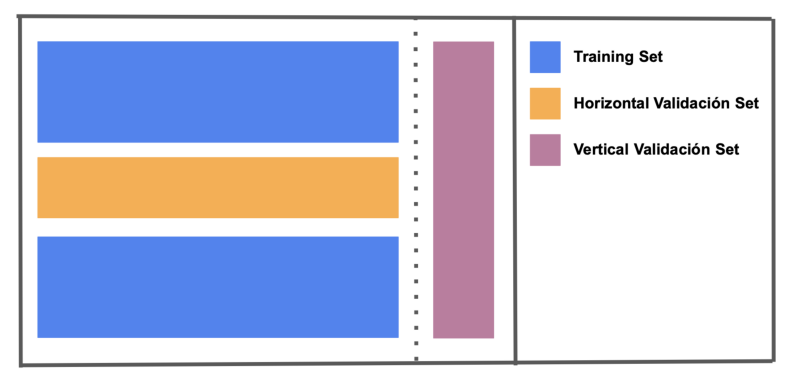

In [9]:
display_img('Separation_2.png', 10, 10)

In [10]:
# External

ctr_test_hor_ext = ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Peru', 'Uruguay']

ctr_test_ver_ext = ['Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Venezuela (Bolivarian Republic of)']

# Internal

ctr_test_hor_int = ['Dominica', 'Mauritius', 'Netherlands', 'Armenia', 'Kazakhstan', 'Russian Federation', 'Ukraine', 'Bangladesh', 'India', 'Somalia']

ctr_test_ver_int = ['Afghanistan', 'New Zealand', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Philippines']

# Validation

ctr_val_hor = ['Albania', 'Qatar', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Poland', 'Portugal', 'Republic of Korea', 'Senegal', 'Republic of Moldova', 
               'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Morocco', 'Montenegro']

ctr_val_ver = ['Algeria', 'Luxembourg', 'Sierra Leone', 'Seychelles', 'Serbia', 'Saudi Arabia', 'Mongolia', 'Micronesia (Federated States of)', 'Mexico',
               'Mauritania', 'Malta', 'Mali', 'Maldives', 'Malaysia', 'Malawi', 'Madagascar', 'Lithuania', 'Slovakia', 'Libya', 'Liberia']

# All validation and test countries

all_ctr = ctr_test_hor_ext + ctr_test_ver_ext + ctr_test_hor_int + ctr_test_ver_int + ctr_val_hor + ctr_val_ver 

In [11]:
# External

df_test_hor_ext = df[(df['Country'].isin(ctr_test_hor_ext)) & (df['Year'] != 2015)]
df_test_ver_ext = df[(df['Country'].isin(ctr_test_ver_ext)) & (df['Year'] == 2015)]

# Internal

df_test_hor_int = df[(df['Country'].isin(ctr_test_hor_int)) & (df['Year'] != 2015)]
df_test_ver_int = df[(df['Country'].isin(ctr_test_ver_int)) & (df['Year'] == 2015)]

# Validation

df_val_hor = df[(df['Country'].isin(ctr_val_hor)) & (df['Year'] != 2015) & (df['Year'] != 2014)]
df_val_ver = df[(df['Country'].isin(ctr_val_ver)) & (df['Year'] == 2014)]

# Train

df_train = df[(~df['Country'].isin(all_ctr)) & (df['Year'] != 2015) & (df['Year'] != 2014)]

In [12]:
# External

X_test_hor_ext = df_test_hor_ext[X_cols]
y_test_hor_ext = df_test_hor_ext[y_col]

X_test_ver_ext = df_test_ver_ext[X_cols]
y_test_ver_ext = df_test_ver_ext[y_col]

# Internal

X_test_hor_int = df_test_hor_int[X_cols]
y_test_hor_int = df_test_hor_int[y_col]

X_test_ver_int = df_test_ver_int[X_cols]
y_test_ver_int = df_test_ver_int[y_col]

# Validation

X_val_hor = df_val_hor[X_cols]
y_val_hor = df_val_hor[y_col]

X_val_ver = df_val_ver[X_cols]
y_val_ver = df_val_ver[y_col]

# Train

X_train = df_train[X_cols]
y_train = df_train[y_col]

### ii. Numerical and categorical

In [13]:
num_X_cols = X_cols.copy()
num_X_cols.remove('Status')

cat_X_cols = ['Status']

In [14]:
num_X_cols

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [15]:
cat_X_cols

['Status']

### iii. FillNaNs

In [16]:
mean_num_X_cols = X_train[num_X_cols].mean()

In [17]:
X_train[num_X_cols] = X_train[num_X_cols].fillna(mean_num_X_cols)
X_train['Status'] = X_train['Status'].fillna('Developing')

### iv. Analysis "y" variable

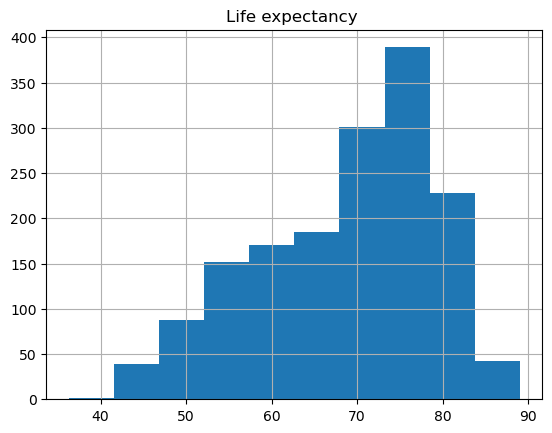

In [18]:
y_train.hist()
plt.show()

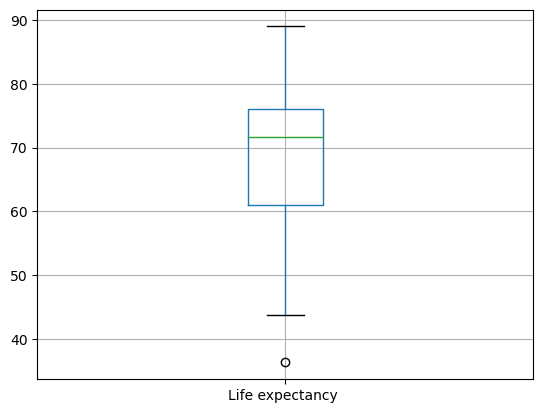

In [19]:
y_train.boxplot()
plt.show()

### v. Analysis "y" variable period by period

In [20]:
gb_y = df_train.groupby(by = ['Year'], as_index = False)['Life expectancy '].mean()

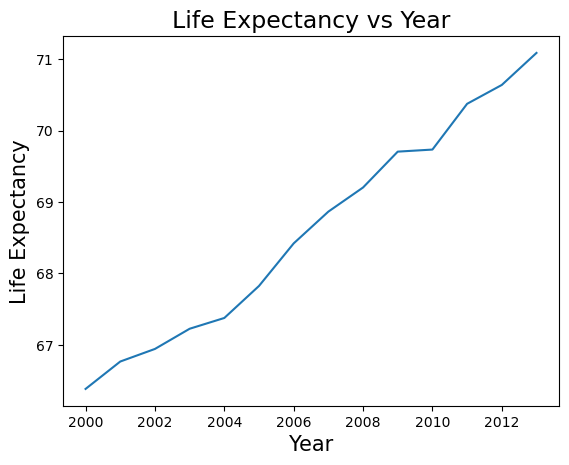

In [21]:
plt.plot(gb_y['Year'], gb_y['Life expectancy '], label = 'Life Expectancy')
plt.title('Life Expectancy vs Year', fontsize = 17)
plt.ylabel('Life Expectancy', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()

### vi. Relation dependent variable with independent: Numerical (Spearman Correlation)

In [22]:
X_train_corr_num = X_train[num_X_cols].copy()
y_train_corr = y_train.copy()

In [23]:
X_train_corr_num = X_train_corr_num.rank(method = 'first', ascending = True)
y_train_corr = y_train_corr.rank(method = 'first', ascending = False)

In [24]:
spe_corr_num = []

for c_num in num_X_cols:

    spe_corr_num.append([c_num, abs(y_train_corr['Life expectancy '].corr(X_train_corr_num[c_num]))])

In [25]:
spe_corr_num = dict(spe_corr_num)

In [26]:
spe_corr_num

{'Year': 0.1350743541682314,
 'Adult Mortality': 0.6630452935041735,
 'infant deaths': 0.5936339082051267,
 'Alcohol': 0.4206614214766979,
 'percentage expenditure': 0.5347505713855052,
 'Hepatitis B': 0.28831762432445207,
 'Measles ': 0.22139901607710463,
 ' BMI ': 0.5927082532819016,
 'under-five deaths ': 0.616444009858386,
 'Polio': 0.5548662043828231,
 'Total expenditure': 0.31508934592120286,
 'Diphtheria ': 0.5698304527461284,
 ' HIV/AIDS': 0.7426836377202707,
 'GDP': 0.550115507989789,
 'Population': 0.01461151755612672,
 ' thinness  1-19 years': 0.6377384181004172,
 ' thinness 5-9 years': 0.6452913582354334,
 'Income composition of resources': 0.8147647882984216,
 'Schooling': 0.7956246125154025}

### vii. Relation dependent variable with independent: Categorical (Anova)

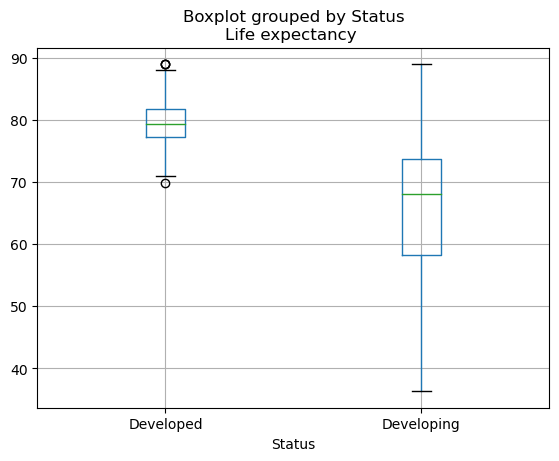

In [27]:
df_train.boxplot('Life expectancy ', by = 'Status')
plt.show()

In [28]:
k = 2

In [29]:
S_1 = y_train[X_train['Status'] == 'Developed']['Life expectancy '].std()
S_2 = y_train[X_train['Status'] == 'Developing']['Life expectancy '].std()

In [30]:
S_1, S_2

(3.719361036031604, 9.52517305894413)

In [31]:
n_1 = (X_train['Status'] == 'Developed').sum()
n_2 = (X_train['Status'] == 'Developing').sum()

In [32]:
n_1, n_2

(308, 1288)

In [33]:
n_T = len(X_train)

In [34]:
n_T, n_1 + n_2

(1596, 1596)

In [35]:
bar_y = y_train['Life expectancy '].mean()

In [36]:
bar_y

68.61015037593984

In [37]:
bar_y_1 = y_train[X_train['Status'] == 'Developed']['Life expectancy '].mean()
bar_y_2 = y_train[X_train['Status'] == 'Developing']['Life expectancy '].mean()

In [38]:
bar_y_1, bar_y_2

(79.3487012987013, 66.04223602484471)

In [39]:
SS_B = n_1*((bar_y_1 - bar_y)**2) + n_2*((bar_y_2 - bar_y)**2)

In [40]:
SS_B

44010.78372314191

In [41]:
SS_W = (n_1 - 1)*(S_1**2) + (n_2 - 1)*(S_2**2)

In [42]:
SS_W

121015.05184076822

In [43]:
MS_B = SS_B/(k - 1)

In [44]:
MS_B

44010.78372314191

In [45]:
MS_W = SS_W/(n_T - k)

In [46]:
MS_W

75.91910404063252

In [47]:
F_stat = MS_B/MS_W

In [48]:
alpha = 0.05

In [49]:
cdf = scipy.stats.f.cdf(F_stat, k - 1, n_T - k)

In [50]:
p_value = 1 - cdf

In [51]:
p_value

1.1102230246251565e-16

In [52]:
p_value < alpha

True

**Comments** We only have one categorical indepedent variable and its importance is cdf.

### viii. Plot the relation between dependent and independent variables: Numerical

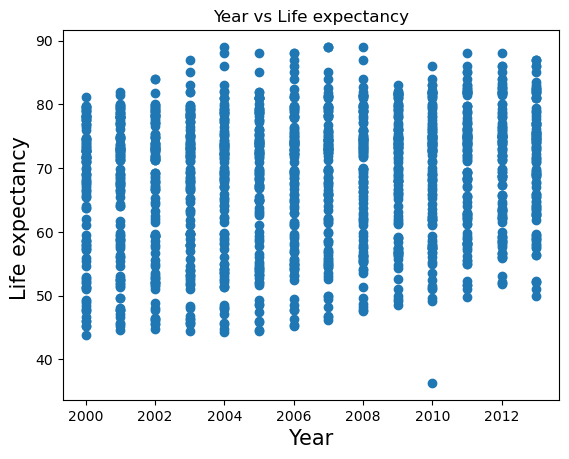

------------------------------------------------------------------------------------------


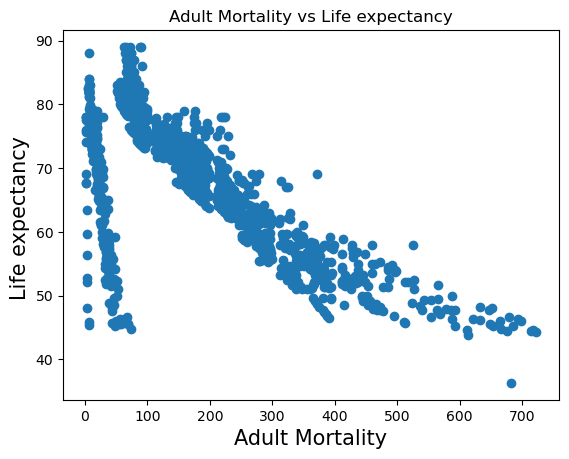

------------------------------------------------------------------------------------------


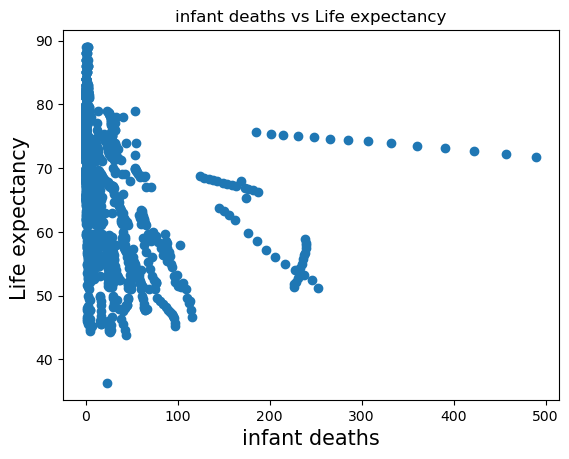

------------------------------------------------------------------------------------------


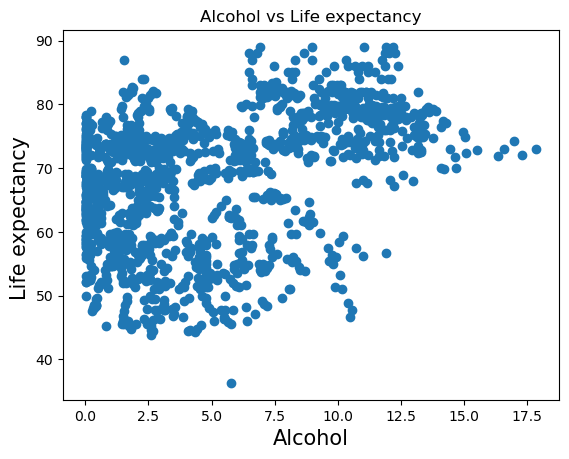

------------------------------------------------------------------------------------------


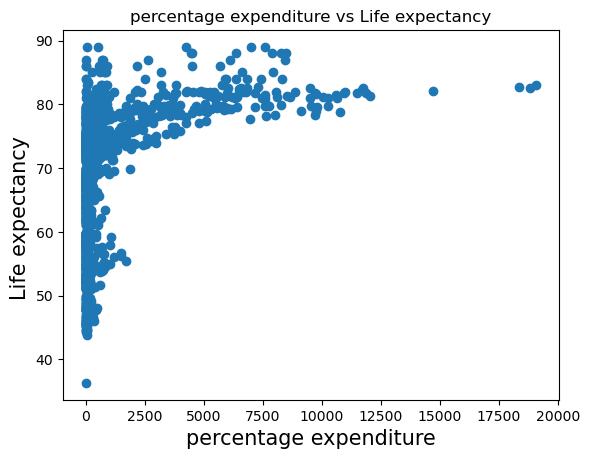

------------------------------------------------------------------------------------------


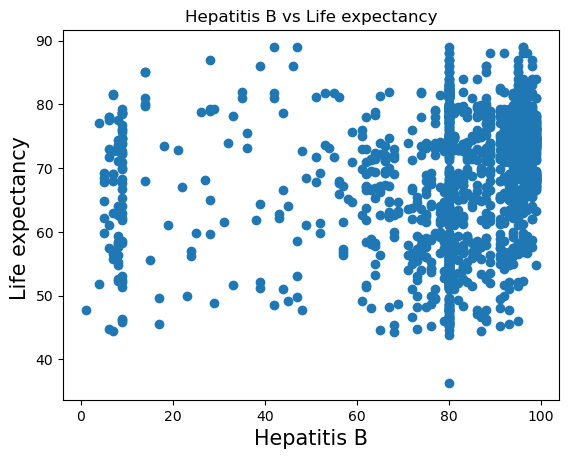

------------------------------------------------------------------------------------------


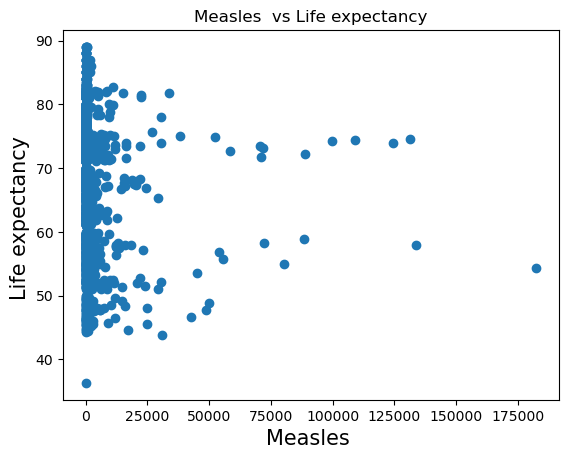

------------------------------------------------------------------------------------------


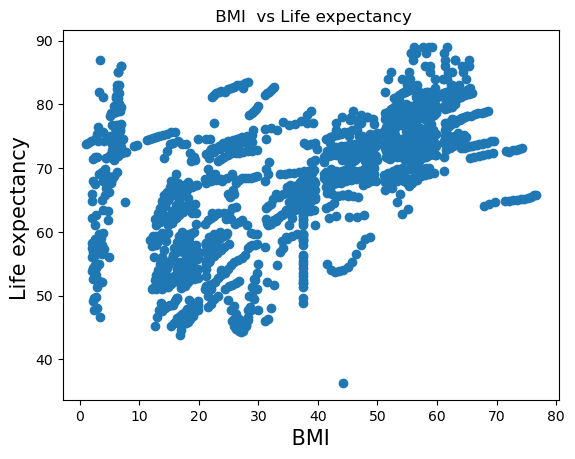

------------------------------------------------------------------------------------------


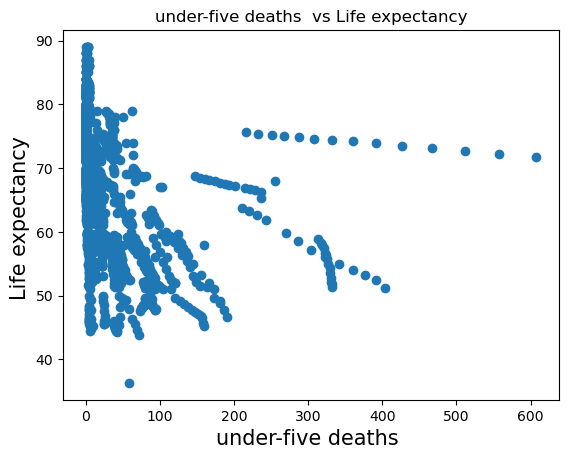

------------------------------------------------------------------------------------------


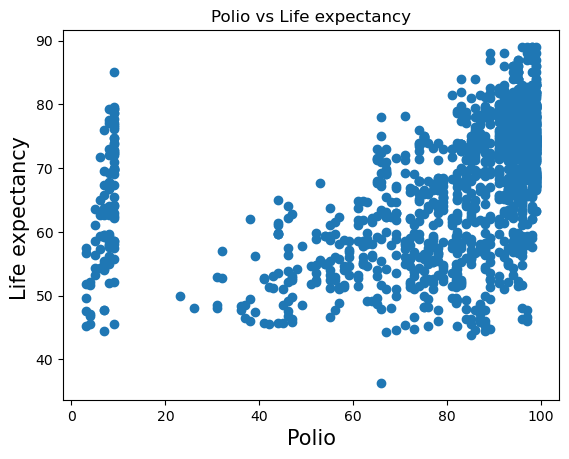

------------------------------------------------------------------------------------------


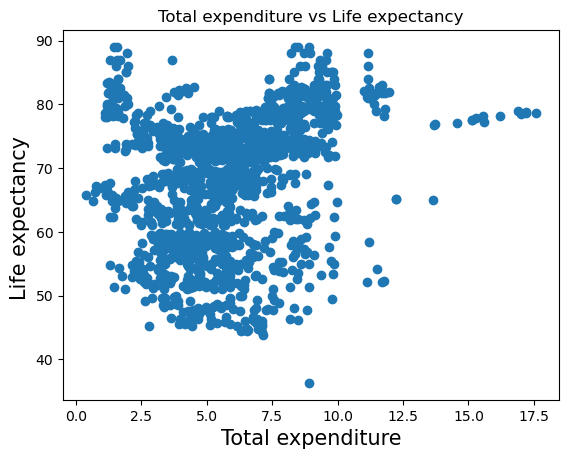

------------------------------------------------------------------------------------------


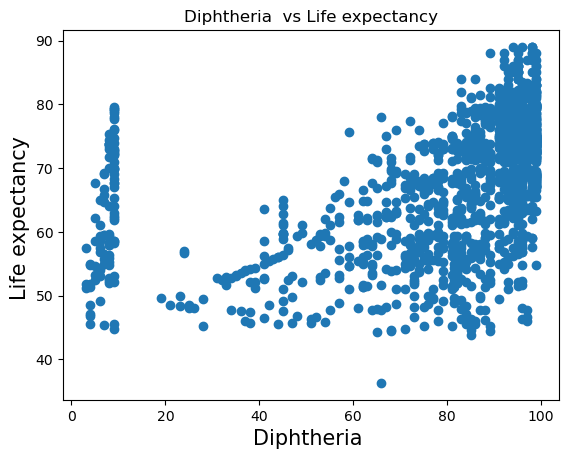

------------------------------------------------------------------------------------------


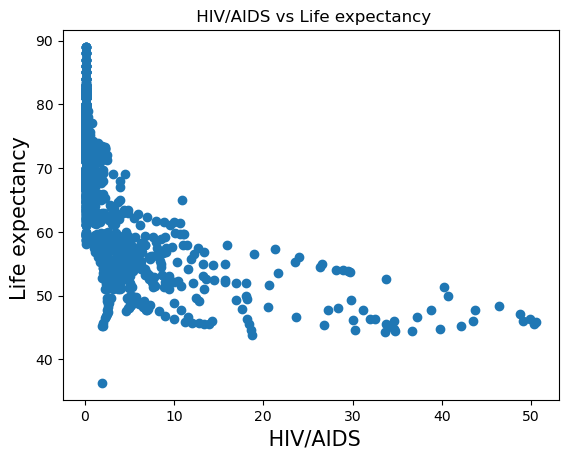

------------------------------------------------------------------------------------------


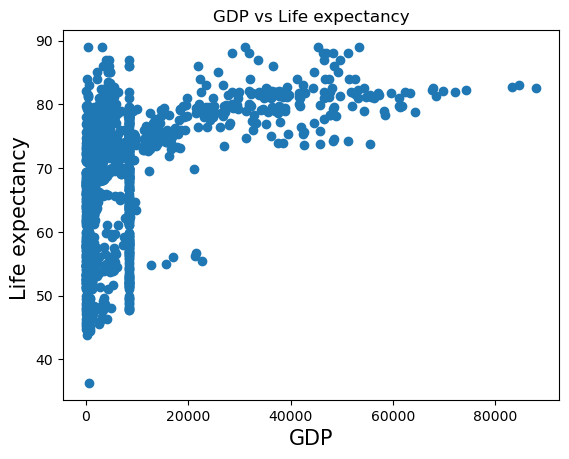

------------------------------------------------------------------------------------------


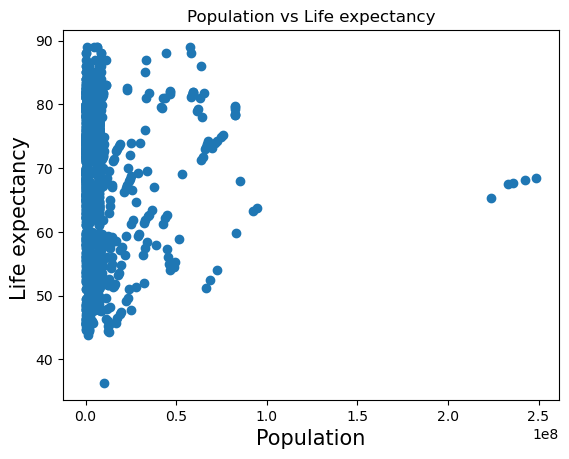

------------------------------------------------------------------------------------------


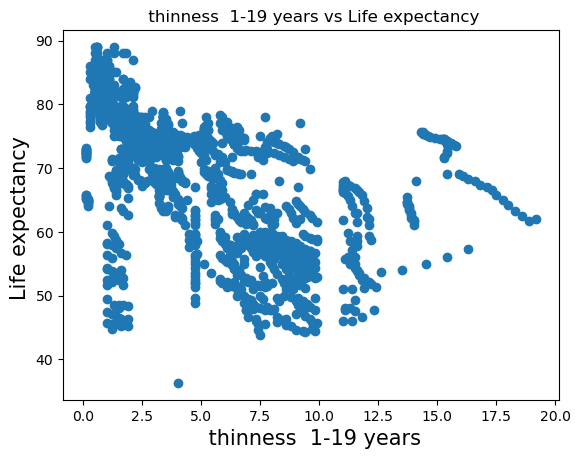

------------------------------------------------------------------------------------------


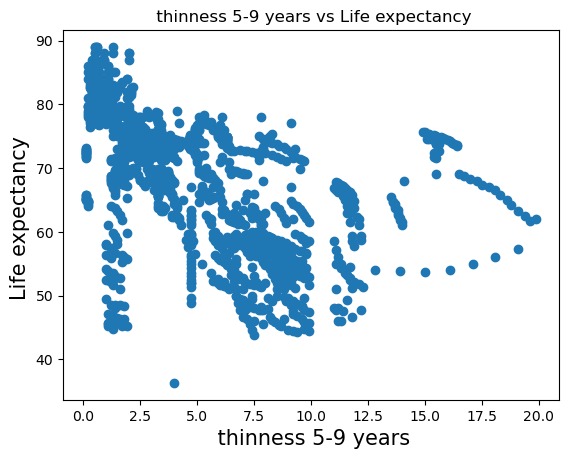

------------------------------------------------------------------------------------------


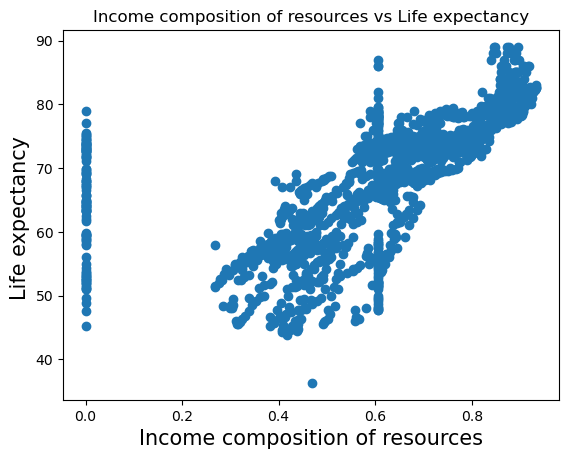

------------------------------------------------------------------------------------------


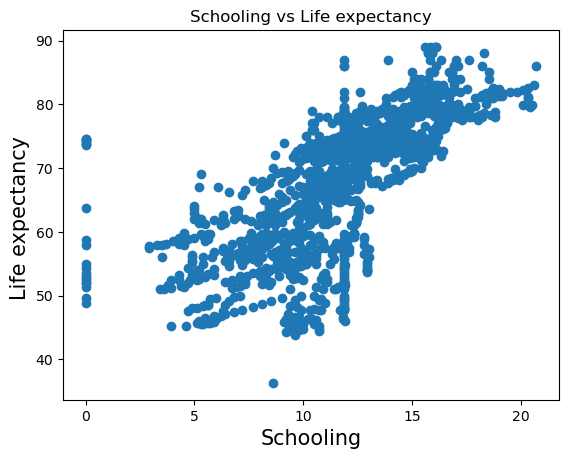

------------------------------------------------------------------------------------------


In [53]:
for n_X_c in num_X_cols:

    plt.scatter(X_train[n_X_c], y_train['Life expectancy '])
    plt.title(f'{n_X_c} vs Life expectancy')
    plt.xlabel(n_X_c, fontsize = 15)
    plt.ylabel('Life expectancy ', fontsize = 15)
    plt.show()

    print('-'*90)

### ix. Plot the relation between dependent and independent variables: Categorical

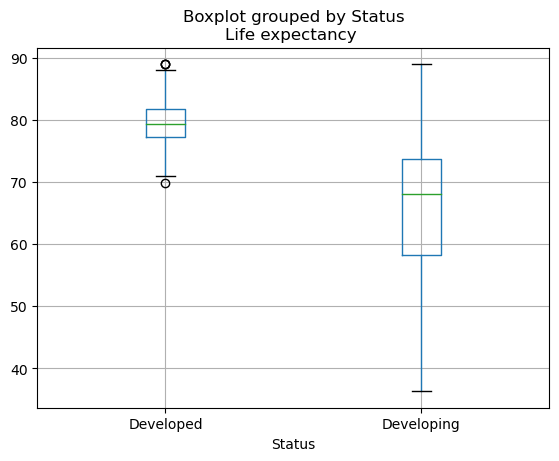

In [54]:
df_train.boxplot('Life expectancy ', by = 'Status')
plt.show()

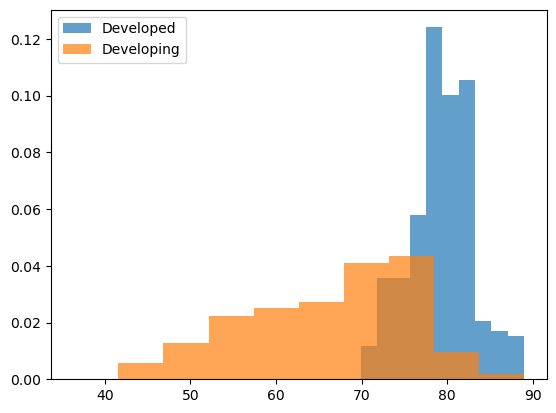

In [55]:
plt.hist(df_train[df_train['Status'] == 'Developed']['Life expectancy '], alpha = 0.7, label = 'Developed', density = True)
plt.hist(df_train[df_train['Status'] == 'Developing']['Life expectancy '], alpha = 0.7, label = 'Developing', density = True)
plt.legend()
plt.show()

### x. Patterns of interest

* Year vs Life Expectancy
* Income composition of resources vs Life expectancy
* GDP vs Life expectancy
* Adult Mortality vs Life expectancy

### xi. Plotting every independent variable: Numerical

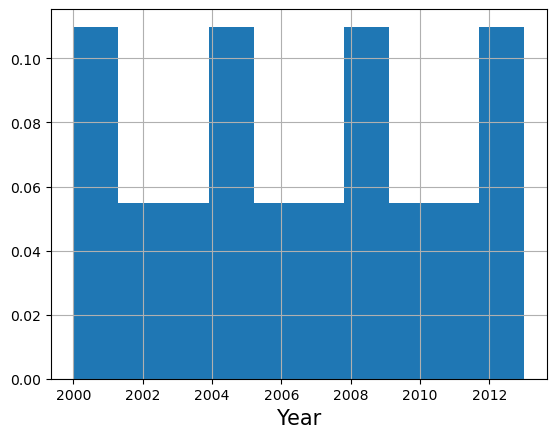

------------------------------------------------------------------------------------------


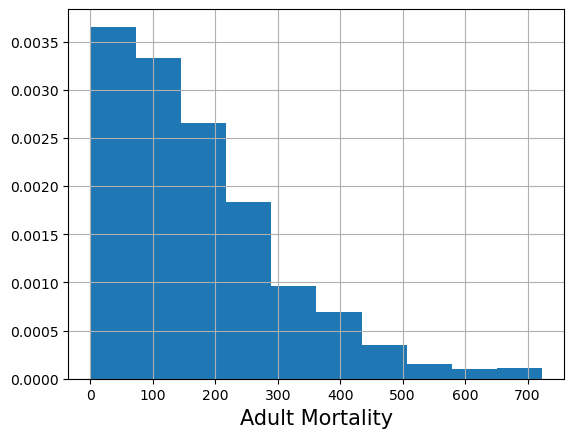

------------------------------------------------------------------------------------------


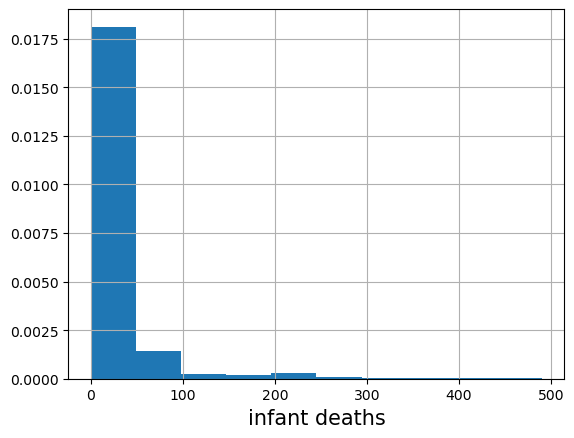

------------------------------------------------------------------------------------------


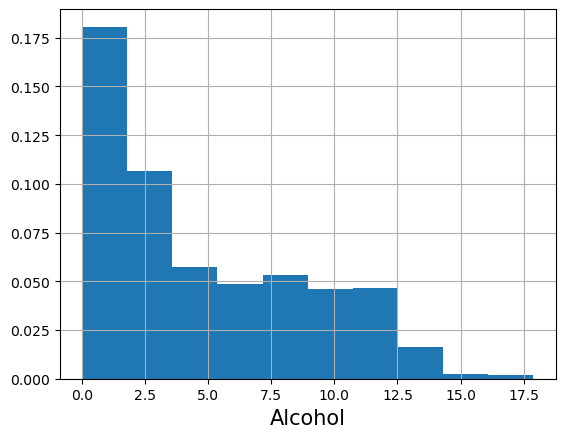

------------------------------------------------------------------------------------------


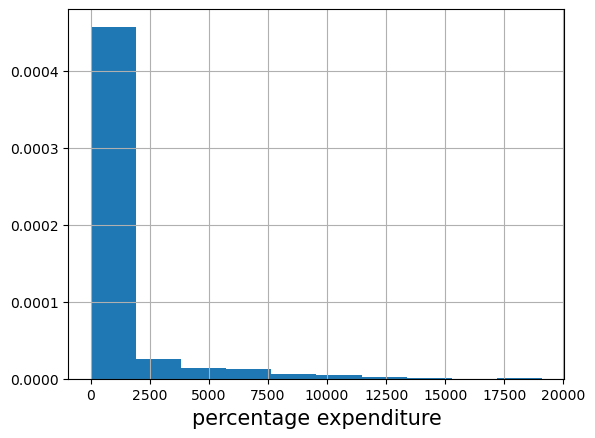

------------------------------------------------------------------------------------------


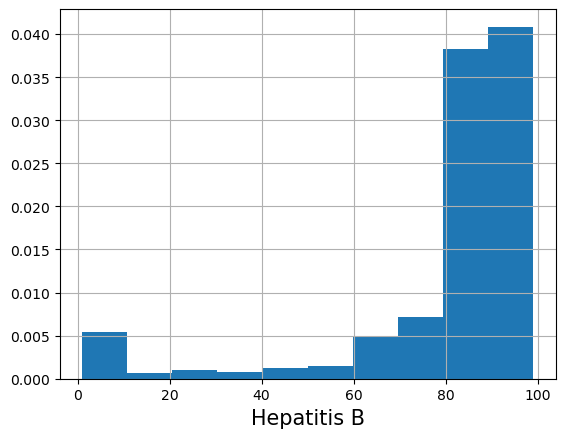

------------------------------------------------------------------------------------------


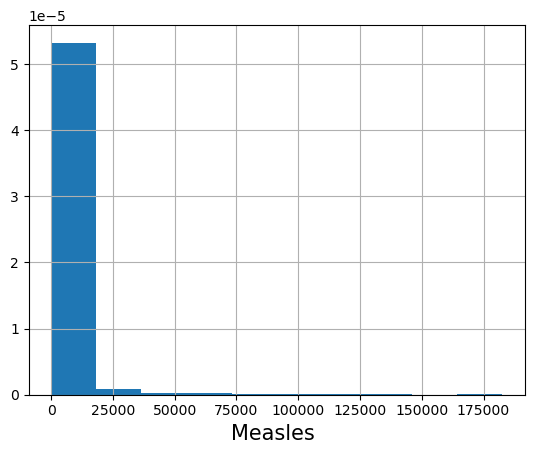

------------------------------------------------------------------------------------------


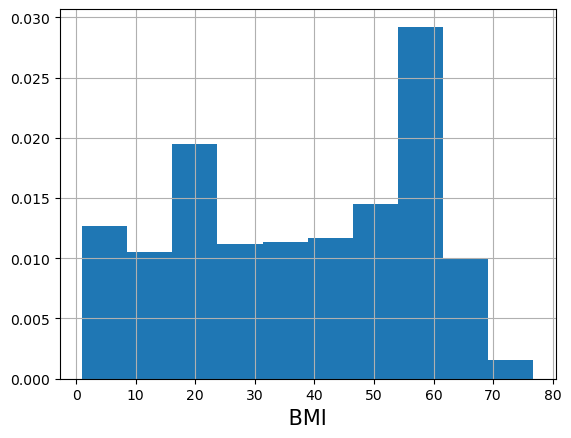

------------------------------------------------------------------------------------------


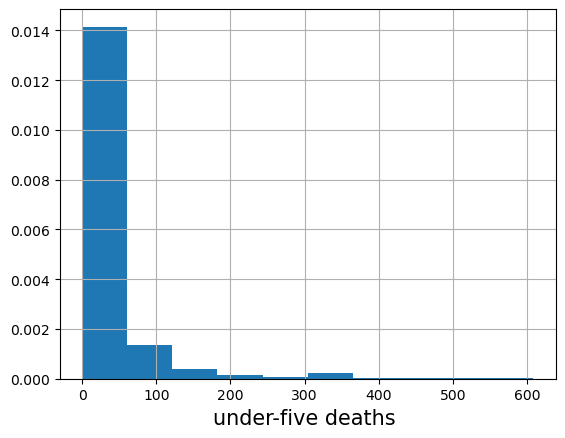

------------------------------------------------------------------------------------------


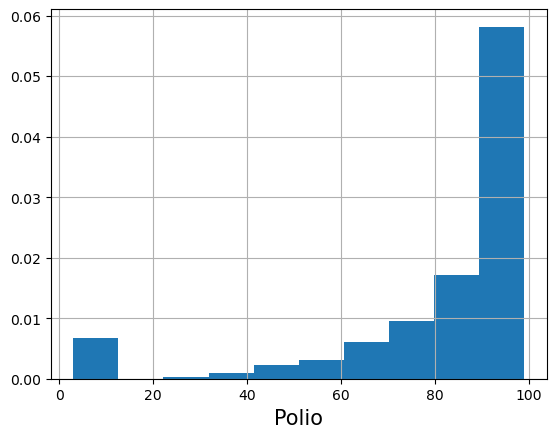

------------------------------------------------------------------------------------------


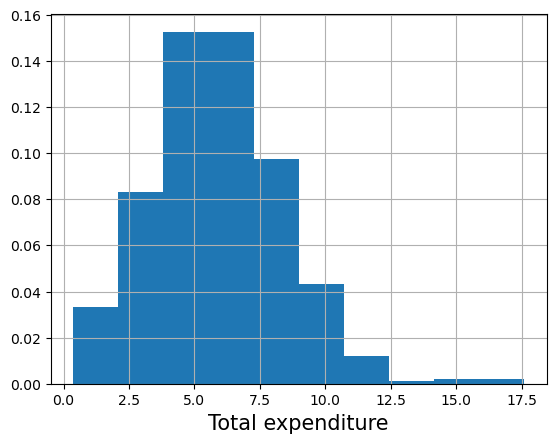

------------------------------------------------------------------------------------------


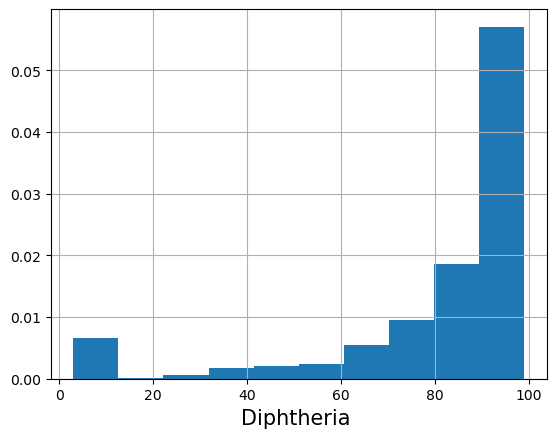

------------------------------------------------------------------------------------------


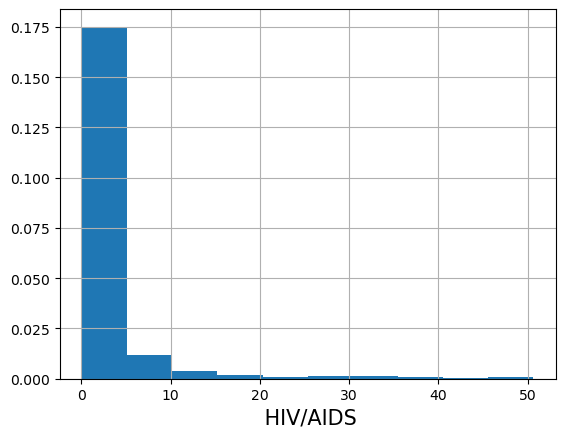

------------------------------------------------------------------------------------------


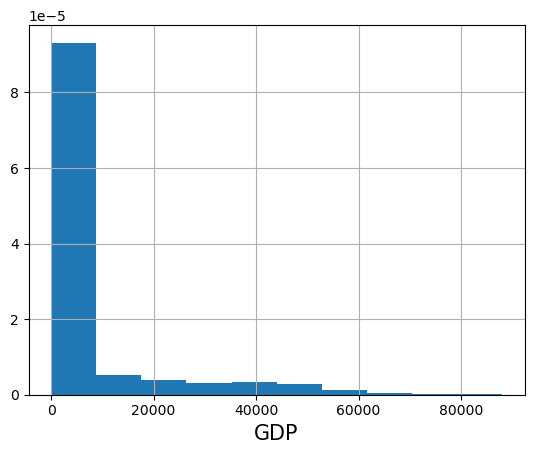

------------------------------------------------------------------------------------------


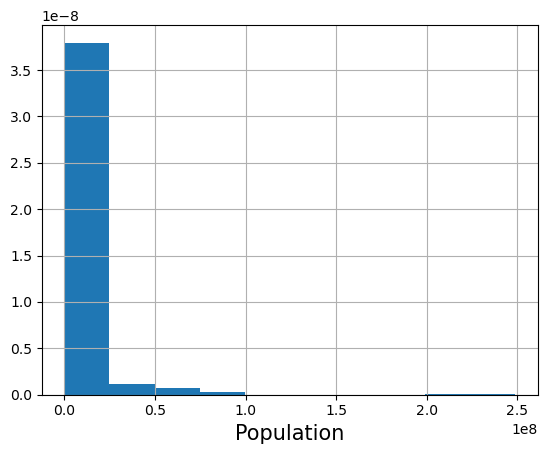

------------------------------------------------------------------------------------------


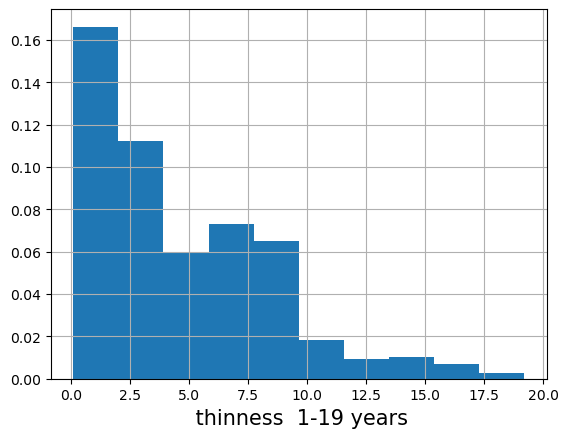

------------------------------------------------------------------------------------------


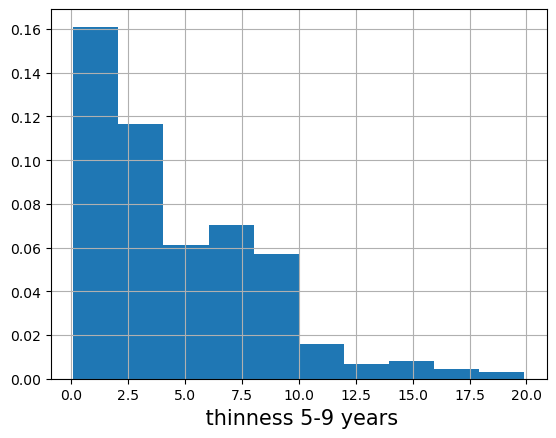

------------------------------------------------------------------------------------------


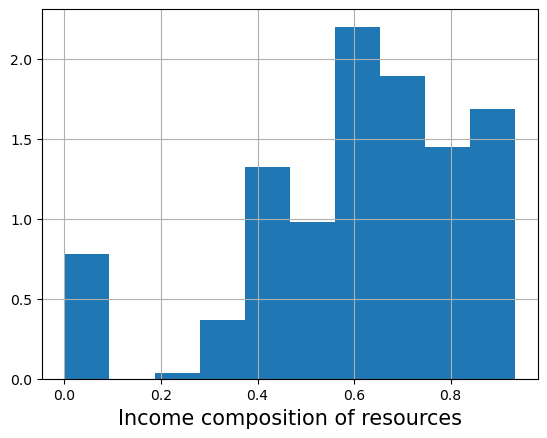

------------------------------------------------------------------------------------------


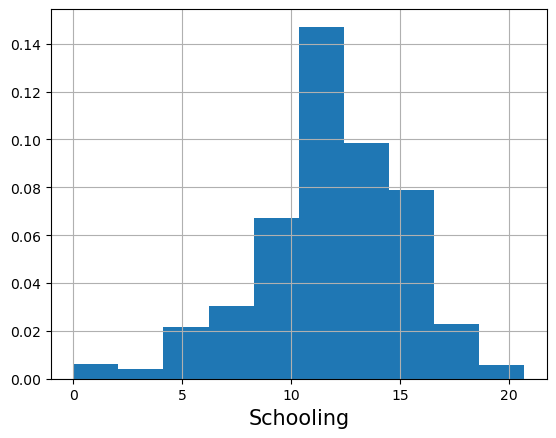

------------------------------------------------------------------------------------------


In [56]:
for n_X_c in num_X_cols:
    X_train[n_X_c].hist(density = True)
    plt.xlabel(n_X_c, fontsize = 15)
    plt.show()
    print('-'*90)

### xii. Plotting every independent variable: Categorical

In [57]:
X_train['Status'].value_counts()

Developing    1288
Developed      308
Name: Status, dtype: int64

In [58]:
round(X_train['Status'].value_counts(normalize = True)*100, 2)

Developing    80.7
Developed     19.3
Name: Status, dtype: float64

### xiii. Relation between numerical independent variables (Spearman)

In [59]:
m_corr_num = round(abs(X_train_corr_num.corr())*100, 2)

In [60]:
m_corr_num.style.background_gradient(cmap='coolwarm')

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,100.000000,3.310000,2.170000,6.150000,11.370000,22.020000,6.090000,13.830000,1.830000,14.680000,8.950000,17.020000,0.580000,13.130000,3.560000,1.910000,1.940000,17.780000,17.030000
Adult Mortality,3.310000,100.000000,40.260000,21.930000,36.040000,19.660000,13.450000,43.340000,42.180000,34.400000,21.380000,34.890000,52.180000,33.570000,6.020000,46.310000,46.490000,53.160000,51.380000
infant deaths,2.170000,40.260000,100.000000,39.230000,47.380000,30.070000,60.280000,47.010000,99.070000,41.520000,18.240000,42.440000,58.570000,33.230000,28.450000,45.660000,45.390000,52.290000,59.720000
Alcohol,6.150000,21.930000,39.230000,100.000000,35.740000,0.120000,16.600000,30.220000,38.450000,22.360000,35.710000,25.340000,25.430000,36.490000,1.610000,44.860000,43.910000,45.290000,49.440000
percentage expenditure,11.370000,36.040000,47.380000,35.740000,100.000000,12.200000,18.540000,35.530000,47.630000,26.390000,16.810000,29.200000,32.890000,43.530000,16.490000,42.790000,42.590000,58.640000,58.580000
Hepatitis B,22.020000,19.660000,30.070000,0.120000,12.200000,100.000000,24.740000,21.470000,29.770000,64.330000,6.940000,66.820000,27.420000,14.830000,0.980000,8.780000,8.330000,25.880000,28.630000
Measles,6.090000,13.450000,60.280000,16.600000,18.540000,24.740000,100.000000,25.790000,60.290000,26.660000,13.420000,25.140000,26.730000,8.550000,24.360000,21.370000,20.740000,16.920000,23.010000
BMI,13.830000,43.340000,47.010000,30.220000,35.530000,21.470000,25.790000,100.000000,48.310000,35.630000,31.100000,37.720000,50.180000,37.910000,4.570000,58.800000,58.470000,55.950000,58.670000
under-five deaths,1.830000,42.180000,99.070000,38.450000,47.630000,29.770000,60.290000,48.310000,100.000000,41.740000,19.320000,42.590000,60.140000,34.400000,28.130000,46.940000,46.700000,53.420000,61.030000
Polio,14.680000,34.400000,41.520000,22.360000,26.390000,64.330000,26.660000,35.630000,41.740000,100.000000,18.860000,91.280000,46.980000,34.220000,0.470000,29.130000,28.740000,50.380000,53.220000


In [61]:
var_corr_num = []

for c in num_X_cols:
    corr_c = list(m_corr_num[m_corr_num[c] > 70][c].index)
    for c_j in corr_c:
        if c_j != c:
            if (([c, c_j] in var_corr_num) == False) and (([c_j, c] in var_corr_num) == False):
                var_corr_num.append([c, c_j])

In [62]:
var_corr_num

[['infant deaths', 'under-five deaths '],
 ['Polio', 'Diphtheria '],
 [' thinness  1-19 years', ' thinness 5-9 years'],
 ['Income composition of resources', 'Schooling']]

In [63]:
del_var_num = []

for pair in var_corr_num:

    if spe_corr_num[pair[0]] > spe_corr_num[pair[1]]:

        del_var_num.append(pair[1])

    else:

        del_var_num.append(pair[0])

In [64]:
del_var_num = list(set(del_var_num))

In [65]:
del_var_num

['infant deaths', 'Polio', 'Schooling', ' thinness  1-19 years']

In [66]:
num_X_cols = ['Year', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Total expenditure', 
              'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness 5-9 years', 'Income composition of resources']

### xiv. Relation between categorical independent variables (Chi-Square)

It's not necessary because we have only one categorical variable.

### xv. Encoding

In [67]:
X_train['Status'] = (X_train['Status'] == 'Developed')*1

In [68]:
round(X_train['Status'].mean()*100, 2)

19.3

### xvi. Relation between all variables

In [69]:
X_cols = ['Status', 'Year', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 
          'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness 5-9 years', 'Income composition of resources']

In [70]:
X_train_corr = X_train[X_cols].copy()
X_train_corr = X_train_corr.rank(method = 'first', ascending = True)

In [71]:
m_corr = abs(X_train_corr.corr()*100)

In [72]:
m_corr.style.background_gradient(cmap='coolwarm')

,Status,Year,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Income composition of resources
Status,100.000000,4.107793,25.642221,27.031854,20.363246,4.839527,13.633822,27.768606,8.130476,23.116749,21.395065,5.505744,26.789086,4.221957,34.089979,32.342962
Year,4.107793,100.000000,3.308635,6.152747,11.370302,22.021120,6.091720,13.825942,1.827968,8.948045,17.021936,0.584613,13.134460,3.562591,1.937936,17.782005
Adult Mortality,25.642221,3.308635,100.000000,21.934376,36.035743,19.655240,13.454834,43.335550,42.180138,21.377586,34.890274,52.182307,33.571487,6.015033,46.486233,53.161811
Alcohol,27.031854,6.152747,21.934376,100.000000,35.742993,0.117375,16.603421,30.217339,38.454199,35.708226,25.344325,25.429246,36.492105,1.610521,43.912372,45.292401
percentage expenditure,20.363246,11.370302,36.035743,35.742993,100.000000,12.203585,18.544948,35.532590,47.627900,16.814462,29.204831,32.888489,43.530138,16.487378,42.590386,58.635135
Hepatitis B,4.839527,22.021120,19.655240,0.117375,12.203585,100.000000,24.735075,21.474413,29.766795,6.936859,66.815091,27.419067,14.828385,0.978252,8.334027,25.881427
Measles,13.633822,6.091720,13.454834,16.603421,18.544948,24.735075,100.000000,25.786039,60.294103,13.422622,25.142400,26.734284,8.547047,24.363715,20.738388,16.919284
BMI,27.768606,13.825942,43.335550,30.217339,35.532590,21.474413,25.786039,100.000000,48.309100,31.095284,37.723941,50.180102,37.909041,4.568445,58.470525,55.954696
under-five deaths,8.130476,1.827968,42.180138,38.454199,47.627900,29.766795,60.294103,48.309100,100.000000,19.319891,42.585205,60.135137,34.395267,28.126390,46.702850,53.423910
Total expenditure,23.116749,8.948045,21.377586,35.708226,16.814462,6.936859,13.422622,31.095284,19.319891,100.000000,22.420697,17.345789,13.950754,10.073491,37.054186,22.383692


In [73]:
var_corr = []

for c in X_cols:
    corr_c = list(m_corr[m_corr[c] > 70][c].index)
    for c_j in corr_c:
        if c_j != c:
            if (([c, c_j] in var_corr) == False) and (([c_j, c] in var_corr) == False):
                var_corr.append([c, c_j])

In [74]:
var_corr

[]

### Time of execution

In [75]:
end = time.time()

In [76]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 4 seconds.
